# Project: Analyzing Macbeth

## Introduction
Now we're going to do some rudimentary analysis of Shakespeare's classic play: Macbeth! You will get practice working with lists and dictionaries, conditionals, visualizing data, and thinking analytically about data.

## Objectives
You will be able to:
* Apply string methods to make changes to a string
* Use a `for` loop to iterate over a collection
* Assign values in a dictionary

## Getting the Data
Here we start by importing a Python package called `requests`. We'll use it to pull the transcript of Macbeth from the [Project Gutenberg](https://www.gutenberg.org/) website. We'll also preview a few details about what is now stored in the variable `macbeth`. As you can see, it's a string with 120,253 characters - the first 500 of which are printed below. 

In [1]:
import requests
macbeth = requests.get('http://www.gutenberg.org/cache/epub/2264/pg2264.txt').text

print(type(macbeth))
print(len(macbeth))

# take away the intro and left with body
title_index = 12559
title = "The Tragedie of Macbeth"
body = macbeth[macbeth.find(title, title_index):]

<class 'str'>
120253


## Your Task

Your task is to create a bar graph of the 25 most common words in Shakespeare's Macbeth.  


A common Python programming pattern to count objects, produce histograms, or update statistics is to make calls to a dictionary as you iterate through a list. For example, given a list of words, you can create a dictionary to store counts and then iterate through the list of words, checking how many times each word has appeared using your dictionary, and updating the dictionary count now that you've seen that word again. The `.get()` dictionary method is very useful in doing this. Read the docstring for the `.get()` method and use it along with the pseudocode below to create a bar graph of the 25 most common words from the transcript of Macbeth which has been loaded into the variable 'macbeth'. Be sure to include a title and appropriate labels for your graph.

To get the 25 *most common* words, you will have to sort your counts. If you are not super sure how to do this, checkout out the [Sorting HOW TO](https://docs.python.org/3/howto/sorting.html) Python documentation. Part of being a data scientist is figuring out how to do tasks that you may not have done before. Remember, in these situations, Google is your friend!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Your code here
# Pseudo-code outline
# Split the transcript into words
# Create a dictionary
# Iterate through the text of Macbeth
# Update word counts
# Sort words by counts in descending order
# Create Bar Graph
# Include descriptive titles and labels

## Helper functions

In [3]:
def coords_by_name(name, quantity = 10):
    words = char_word_str(name, body)
    word_count = count_words(words)
    sorted_word_count = sorted_top(word_count, quantity)
    return word_count_coords(sorted_word_count)
    

In [4]:
def create_subplots(coords, titles):
    rows = len(titles) // 2
    columns = len(titles) //2
    fig,a =  plt.subplots(rows, columns, constrained_layout=True)
    counter = 0
    for row in range(rows):
        for column in range(columns):
            a[row][column].bar(coords[counter][0], coords[counter][1])       
            a[row][column].set_title(titles[counter])
            for tick in a[row][column].get_xticklabels():
                tick.set_rotation(55)  
            counter += 1
    plt.show()

In [5]:
def sorted_top(word_count, size = 10):
    """
    Helper function for sorting dictionary.
    """
    word_count_dict = {}
    word_count_tuples = sorted(word_count.items(), reverse=True, key=lambda word: word[1])[:size]
    for pair in word_count_tuples:
        word_count_dict[pair[0]] = pair[1]
    return word_count_dict

In [6]:
def count_words(text):
    """
    Run through each word in the text and check to see if it's in dictionary.
    If not then add to dictionary. If its already present, then increment the count.
    """
    word_count = {}
    words = text.replace('\n', ' ').replace('\r', ' ').split(' ')
    for word in words:
        word = word.lower().strip('*)(?.,:!')        
        if word_count.get(word) != None and len(word):
            word_count[word] += 1
        else:
            word_count[word] = 1
    return word_count

In [7]:
import re
def count_characters(text):
    """
    Use regex to find occurences of Word starting with capital letter and ending with period.
    """
    character_count = {}
    characters = re.findall(r"(\s{3,}[A-Z][a-z]{2,}\.)+", text)
    for character in characters:
        name = character.lower().strip().strip('.').capitalize()
        if character_count.get(name) != None:
            character_count[name] += 1
        else: 
            character_count[name] = 0
    return character_count

In [8]:
def word_count_coords(word_count):
    """
    Takes dict, word_count,
    returns two arrays with x, y coords
    """
    x = list(word_count.keys())
    y = list(word_count.values())
    return x, y

In [9]:
def graph_word_count(word_count, title="Title", xlabel="", ylabel=""):
    """
    Setup and bar graph the given word_count list of tuples.
    """
    x, y = word_count_coords(word_count)
    plt.figure(figsize=(14, 6))
    plt.bar(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.xticks(rotation=45)
    plt.ylabel(ylabel)
    plt.show()

In [10]:
def count_lines(char_lines): 
    """
    Take a dictionary: { 'name': ['line1', 'line3']} as char_lines
    Returns a dictionary with name and total lines: { 'name': int }
    """
    character_word_count = {}
    for character in char_lines:
        character_word_count[character] = len(char_lines[character])
    return character_word_count


In [11]:
def strip_name(line):
    """
    Helper function to pull name out of line.
    Tries to validate that it is indeed a name
    """
    name = line.split('.')[0].strip()
    if line.find('.') > 0 and len(name.split()) < 3:
        return name
    else:
        return ''

In [12]:
def who_said_what(text):
    """
    Takes a str and returns a dictionary: { 'name': ['str', 'str']}
    """
    name = 'Narrator' # default: if no name is present assume its the narrator speaking
    result = {}
    character_lines = text.splitlines()
    for line in character_lines:
        if len(line):
            if line[0] == ' ': 
                # if indented: take character name, add remain line to array
                name = strip_name(line)
                line = "".join(line.split('.')[1:]).strip()
                addline(result, name, line)
            elif len(name):
                # if not indented and name is set, add line to array
                addline(result, name, line)
            else:
                # if not indented and name is not set, add to narrator
                result['Narrator'].append([line])
        else:
            # if new paragraph, reset name
            name = ''
    return result

def addline(result, name, line):
    if result.get(name) is None:
        result[name] = [[line]]
    else:
        result[name].append([line])

In [13]:
def char_word_str(name, text):
    """
    Given name of character as string,
    and text to search through.
    Returns concatenated string of characters complete text
    """
    character_words = who_said_what(text)[name]
    character_str = ""
    for words in character_words:
        character_str += " ".join(words) + " "
    return character_str

### Frequency of words in Macbeth

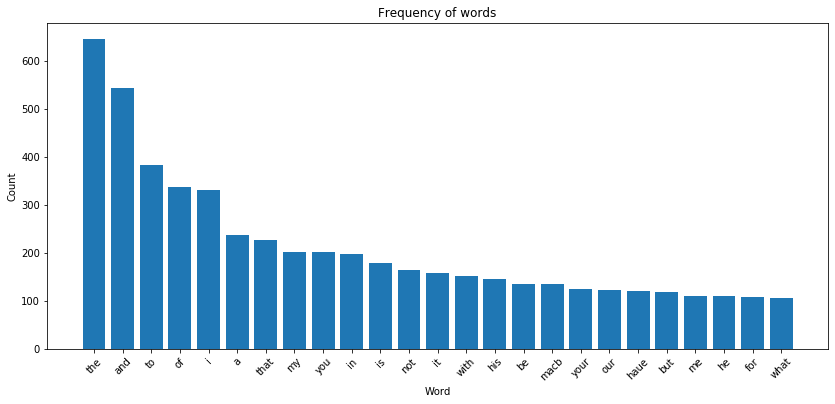

In [14]:
word_count = count_words(body)
sorted_word_count = sorted_top(word_count, 25) # sort desc, return top 25

graph_word_count(sorted_word_count, "Frequency of words", "Word", "Count")

### How many times each name appears (usually as a cue)

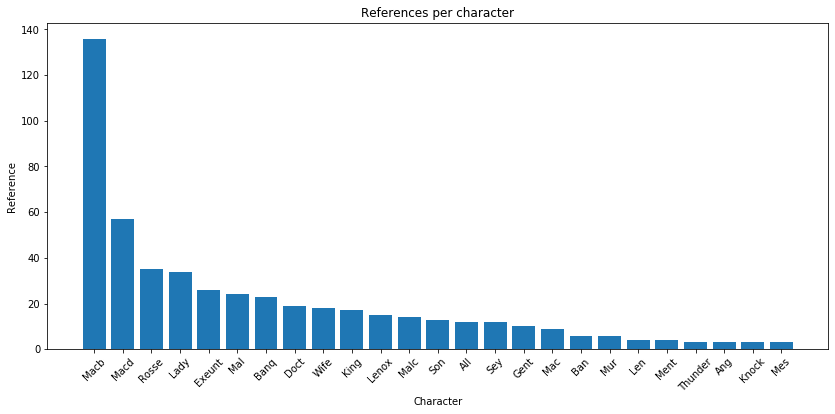

In [15]:
characters = count_characters(body)
sorted_character_count = sorted_top(characters, 25)

graph_word_count(sorted_character_count, "References per character", "Character", "Reference")

### How many lines spoken per person

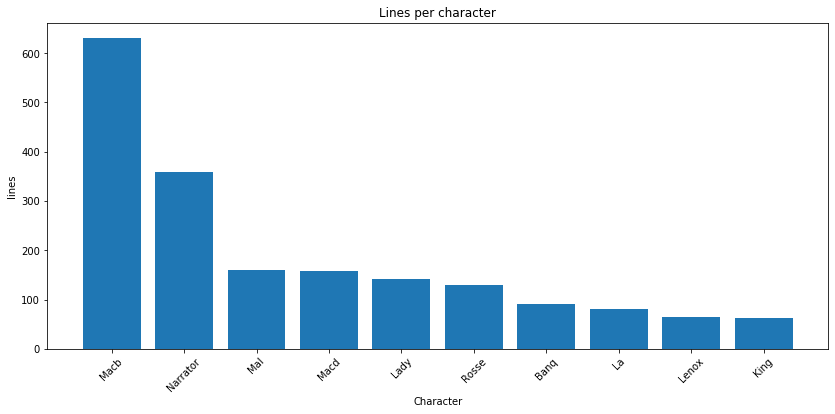

In [16]:
character_lines = count_lines(who_said_what(body))
sorted_words_character = sorted_top(character_lines, 10)

graph_word_count(sorted_words_character, "Lines per character", "Character", "lines")

### Frequency of words in Macbeth, by person

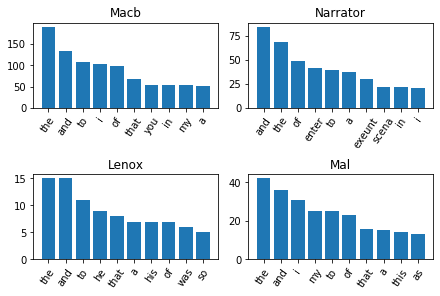

In [17]:
names = ['Macb', 'Narrator', 'Lenox', 'Mal']
coords = []
for name in names:
     coords.append(coords_by_name(name))
create_subplots(coords, names)

## Level Up (Optional)
This project should take you about an hour and a half to complete. If you're done much more quickly than that and are not behind in the course, feel free to deepen your knowledge by completing any or all of the following tasks until you run out of time:
* ~~Create a list of top characters by mentions of their names~~
* ~~Split the text by which character is talking~~
* ~~Create subgraphs of the most common words by character~~
* ~~Reduce the string to the text of the play itself. (Remove any initial notes, forward, introduction, appendix, etc.)~~
* Come up with some other fun analyses of the text!

## Summary
Congratulations! You've got some extra practice combining various data types into useful programming patterns and done an initial analysis of a classic text!